<h1 style = "color : Brown"> Bike Sharing Assignment</h1>

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

<h2 style = "color : Brown"> Business Goal:</h2>

In this assignment we are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


<h2 style = "color : Brown"> Importing Necessary Libraries</h2>

In [47]:
#Load the libraryss
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import random #Using it for generating random values

import matplotlib as mpl
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from sklearn.metrics import r2_score

<h2 style = "color : Brown"> Read the dataset</h2>
We will read the data using read_csv() function of pandas library

In [48]:
df_bike_assignment = pd.read_csv("day.csv",index_col=0)

<h2>Visualizing the Data</h2>

In [49]:
#Looking at the data
df_bike_assignment.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [50]:
#Searching for Missings,type of data and also known the shape of data
df_bike_assignment.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [51]:
#Getting shape of data
df_bike_assignment.shape

(730, 15)

In [52]:
df_bike_assignment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


<h2>Droping all the Unwanted columns</h2>
we will drop all the columns that won't help us with the ML/AI model

In [53]:
df_bike_assignment.drop(['dteday','casual','registered'], axis = 1, inplace= True)

In [54]:
# Looking at the data after removl of columns with null values
df_bike_assignment.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


<h2>Look for missing values in the dataset</h2>

In [55]:
#checking missing values
df_bike_assignment.apply(lambda x: sum(x.isnull()), axis=0)

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

<h2>Plotting the data based on 'cnt' ( count of total rental bikes) column</h2>

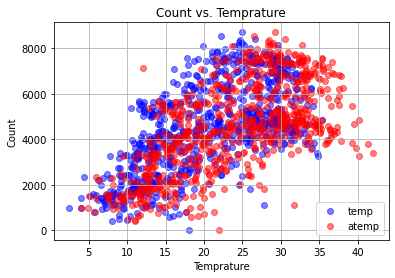

In [56]:
plt.scatter(df_bike_assignment.temp, df_bike_assignment.cnt, color='blue', label='temp', alpha=0.5)
plt.scatter(df_bike_assignment.atemp, df_bike_assignment.cnt, color='red', label='atemp', alpha=0.5)


plt.legend(loc="lower right")
plt.title("Count vs. Temprature")
plt.xlabel("Temprature")
plt.ylabel("Count")
plt.grid()
plt.show()

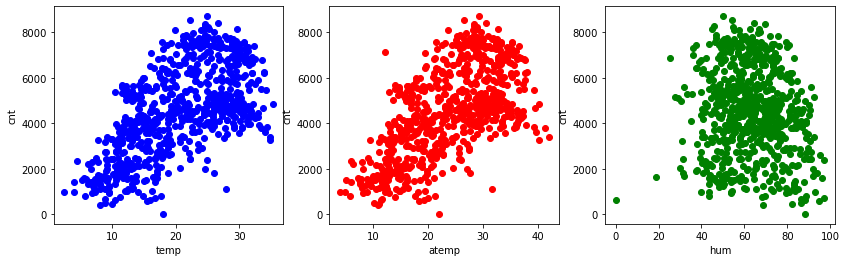

In [57]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
plt.scatter(df_bike_assignment.temp, df_bike_assignment.cnt, color='blue')
plt.xlabel('temp')
plt.ylabel('cnt')

plt.subplot(1,3,2)
plt.scatter(df_bike_assignment.atemp, df_bike_assignment.cnt, color = 'red')
plt.xlabel('atemp')
plt.ylabel('cnt')

plt.subplot(1,3,3)
plt.scatter(df_bike_assignment.hum, df_bike_assignment.cnt, color = 'green')
plt.xlabel('hum')
plt.ylabel('cnt')


plt.show()

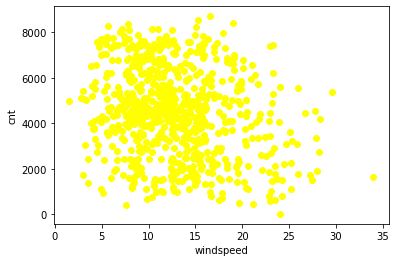

In [58]:
plt.scatter(df_bike_assignment.windspeed, df_bike_assignment.cnt, color = 'yellow')
plt.xlabel('windspeed')
plt.ylabel('cnt')
plt.show()

<h2>Plotting Categorical Data</h2>

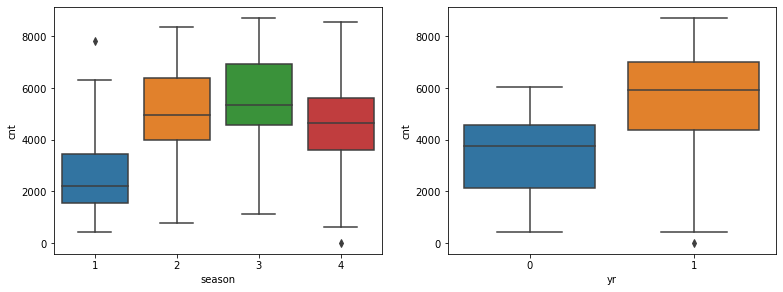

In [59]:
plt.figure(figsize = (20,10))
plt.subplot(2,3,1)
sns.boxplot(data = df_bike_assignment, x= 'season', y = 'cnt')

plt.subplot(2,3,2)
sns.boxplot(data = df_bike_assignment, x= 'yr', y = 'cnt')


plt.subplot(2,3,3)
sns.boxplot(data = df_bike_assignment, x= 'mnth', y = 'cnt')

plt.show()

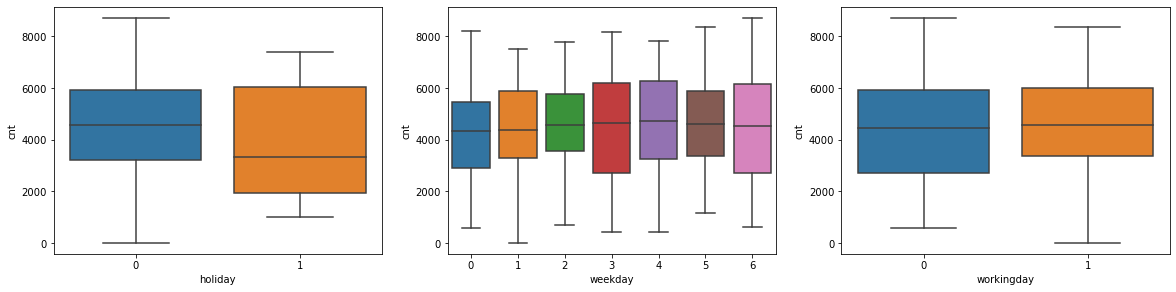

In [14]:
plt.figure(figsize = (20,10))
plt.subplot(2,3,1)
sns.boxplot(data = df_bike_assignment, x= 'holiday', y = 'cnt')

plt.subplot(2,3,2)
sns.boxplot(data = df_bike_assignment, x= 'weekday', y = 'cnt')

plt.subplot(2,3,3)
sns.boxplot(data = df_bike_assignment, x= 'workingday', y = 'cnt')


plt.show()

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

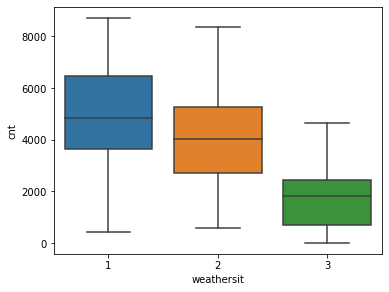

In [15]:
plt.figure(figsize = (20,10))
plt.subplot(2,3,1)
sns.boxplot(data = df_bike_assignment, x= 'weathersit', y = 'cnt')

<h2>Changing Categorical values to categories</h2>

In [16]:
df_bike_assignment['mnth'].replace({1:'January', 2:'February', 3:'March', 4:'April',5:'May', 6:'June', 7:'July', 8:'August',9:'September', 10:'October', 11:'November', 12:'December'}, inplace = True)
df_bike_assignment['season'].replace({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}, inplace = True)
df_bike_assignment['weathersit'].replace({1:'Sunshine',2:'Fog',3:'Rain'},inplace = True)
df_bike_assignment['weekday'].replace({1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Satuarday',0:'Sunday'},inplace = True)

In [17]:
#Looking at the data
df_bike_assignment.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,Spring,0,January,0,Satuarday,0,Fog,14.110847,18.18125,80.5833,10.749882,985
2,Spring,0,January,0,Sunday,0,Fog,14.902598,17.68695,69.6087,16.652113,801
3,Spring,0,January,0,Monday,1,Sunshine,8.050924,9.47025,43.7273,16.636703,1349
4,Spring,0,January,0,Tuesday,1,Sunshine,8.200000,10.60610,59.0435,10.739832,1562
5,Spring,0,January,0,Wednesday,1,Sunshine,9.305237,11.46350,43.6957,12.522300,1600


<h2>Univariate analaysis</h2>

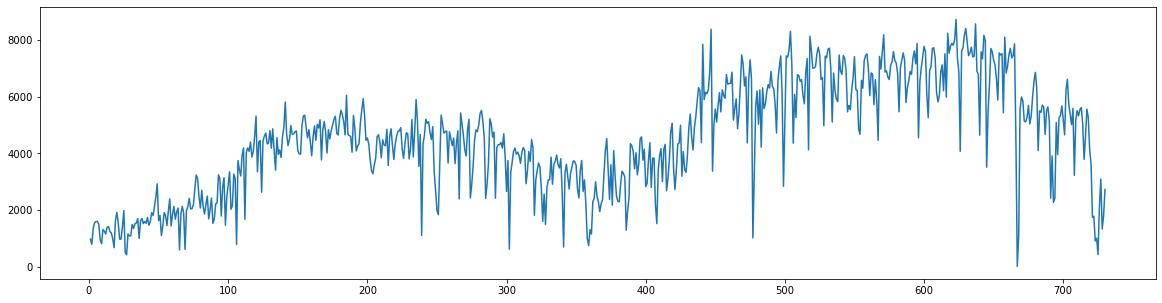

In [18]:
plt.figure(figsize=(20,5))
plt.plot(df_bike_assignment.cnt)
plt.show()

<h2>Bi-Variate analysis</h2>


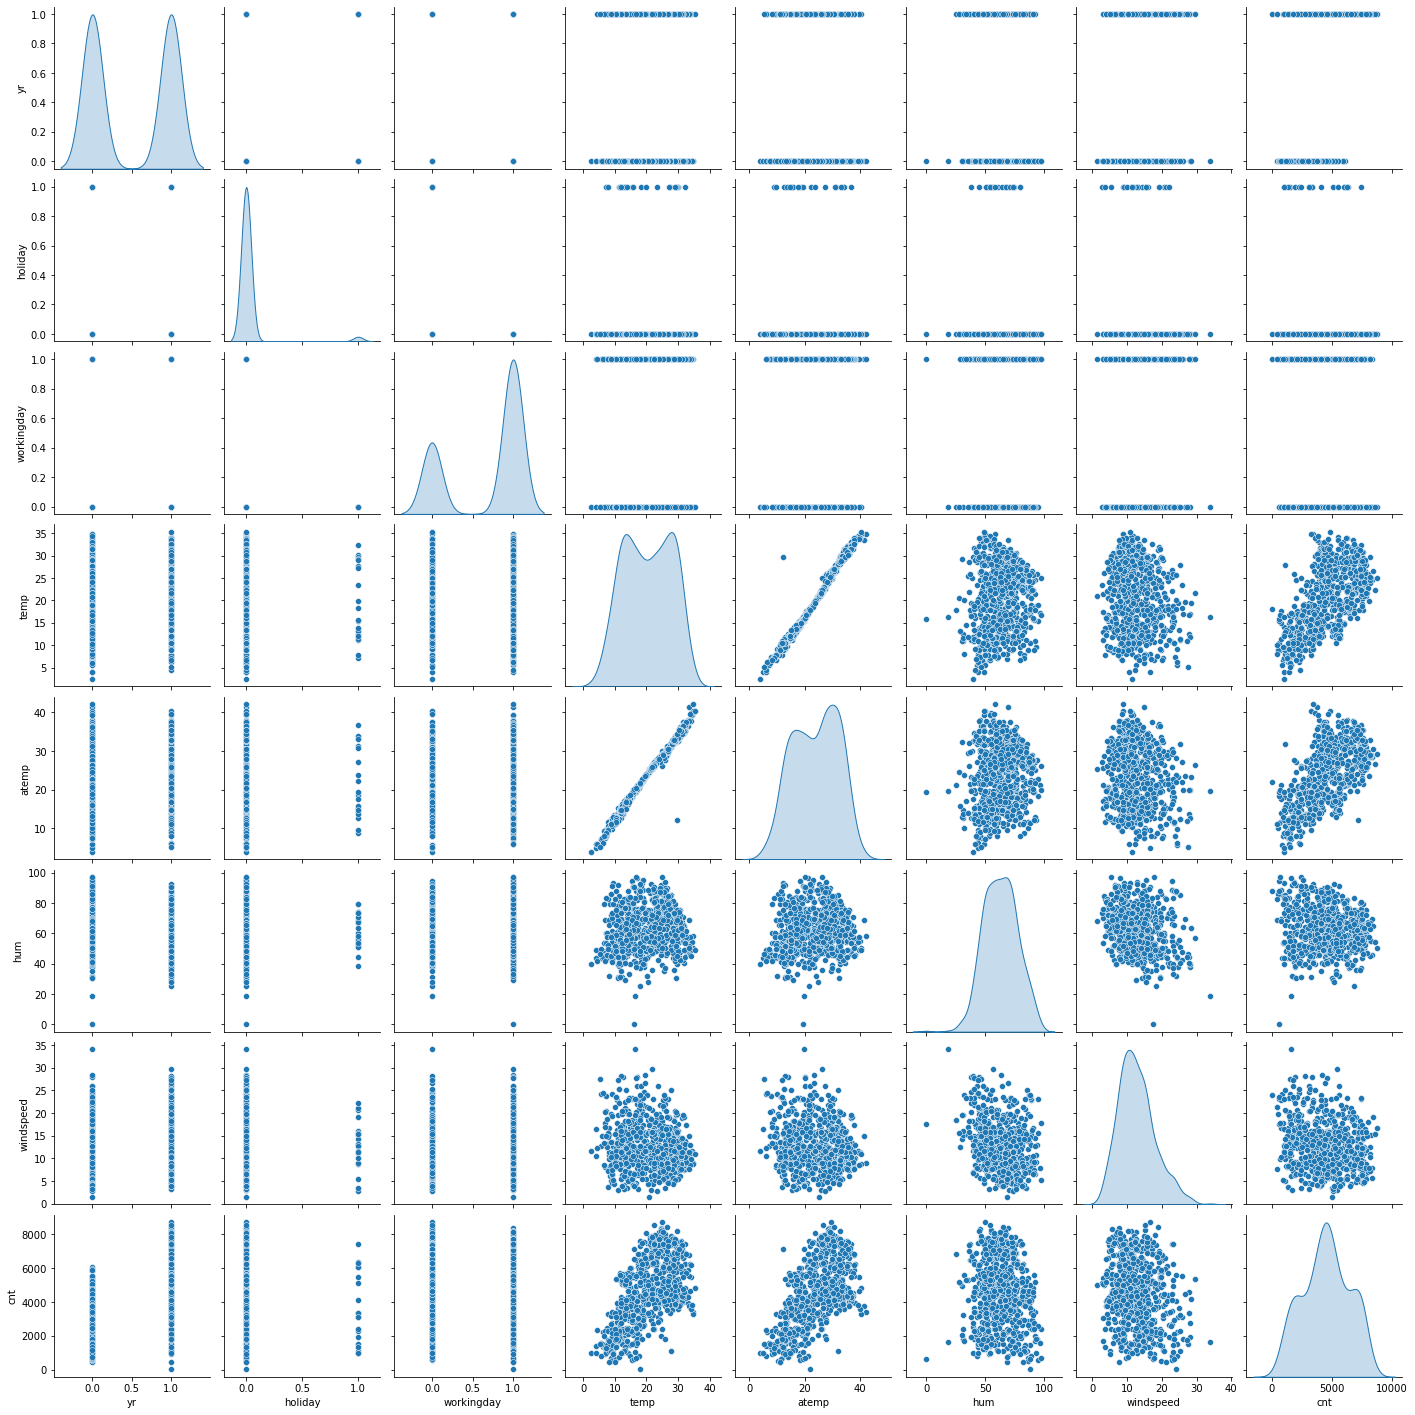

In [19]:
sns.pairplot(df_bike_assignment.select_dtypes(['int64','float64']), diag_kind='kde')
plt.show()

<h2>Correlation</h2>
Lets check how these variables are corelated with each other

In [20]:
df_bike_assignment.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


<h2>Let’s visualize these numbers using a heatmap.</h2>

<AxesSubplot:title={'center':'Correlation Matrix'}>

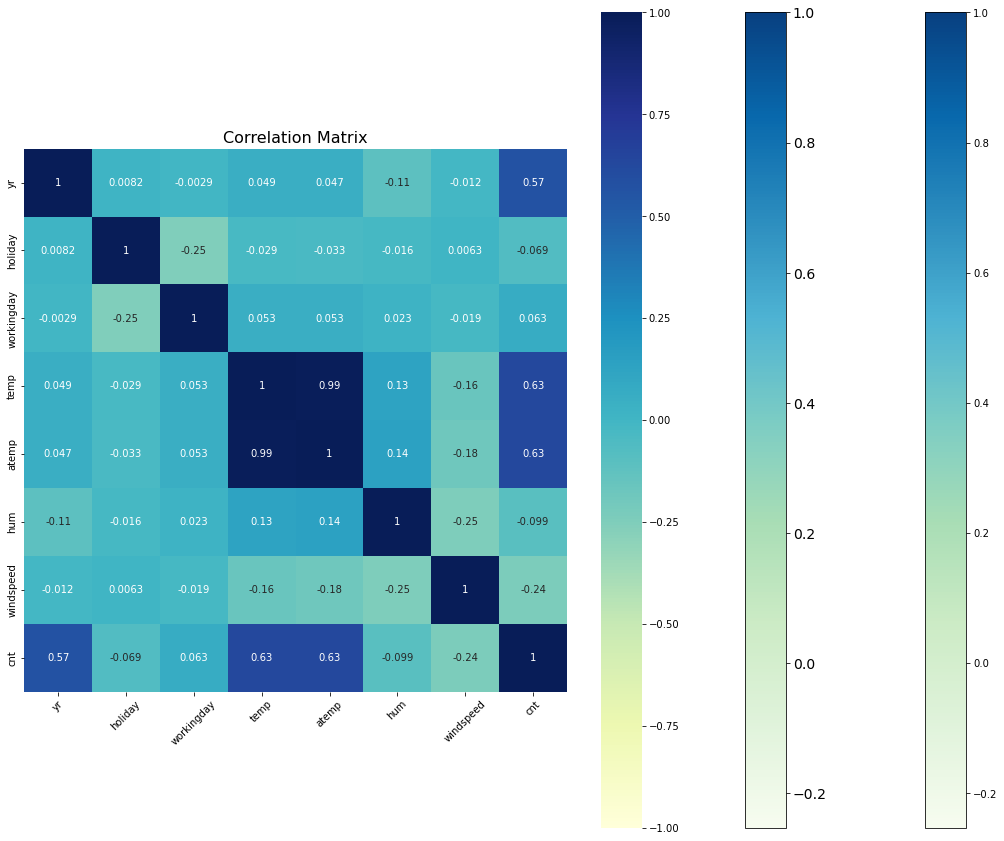

In [21]:
f = plt.figure(figsize=(19, 15))
plt.imshow(df_bike_assignment.corr(), cmap=plt.cm.GnBu,        interpolation='nearest',data=True)
plt.colorbar()
bike_points = [i for i in range(len(df_bike_assignment.columns))]
plt.xticks(bike_points, df_bike_assignment.columns, rotation=45)
plt.yticks(bike_points, df_bike_assignment.columns, rotation=45)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
sns.heatmap(df_bike_assignment.corr(),vmin=-1.0,vmax=1.0,annot=True, cmap="YlGnBu")

<h2>Creating Dummy Variables</h2>

In [22]:
# getting dummy variables for season, weekday, mnth and weathersit
dummy_bike_assignment_vars = pd.get_dummies(df_bike_assignment[['season','weekday','mnth','weathersit']],drop_first=True)

# concatinating the dummy Data frame with original Data frame
df_bike_assignment = pd.concat([df_bike_assignment,dummy_bike_assignment_vars], axis = 1)

# drop season column, weekday, mnth and weathersit
df_bike_assignment.drop(['season','weekday','mnth','weathersit'], axis=1, inplace=True)

df_bike_assignment.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weathersit_Rain,weathersit_Sunshine
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,1,0,0,0,0,0,0,0,0,1
4,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,1,0,0,0,0,0,0,0,0,1
5,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,1,0,0,0,0,0,0,0,0,1


<h3>Checking data frame</h3>

In [23]:
df_bike_assignment.shape

(730, 30)

In [24]:
df_bike_assignment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   hum                  730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    int64  
 8   season_Spring        730 non-null    uint8  
 9   season_Summer        730 non-null    uint8  
 10  season_Winter        730 non-null    uint8  
 11  weekday_Monday       730 non-null    uint8  
 12  weekday_Satuarday    730 non-null    uint8  
 13  weekday_Sunday       730 non-null    uint8  
 14  weekday_Thursday     730 non-null    uint8  
 15  weekday_Tuesday      730 non-null    uin

<h2>Converting categorical columns to numeric </h2>

In [25]:
df_bike_assignment[['yr','holiday','workingday']]= df_bike_assignment[['yr','holiday','workingday']].astype('uint8')
df_bike_assignment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    uint8  
 1   holiday              730 non-null    uint8  
 2   workingday           730 non-null    uint8  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   hum                  730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    int64  
 8   season_Spring        730 non-null    uint8  
 9   season_Summer        730 non-null    uint8  
 10  season_Winter        730 non-null    uint8  
 11  weekday_Monday       730 non-null    uint8  
 12  weekday_Satuarday    730 non-null    uint8  
 13  weekday_Sunday       730 non-null    uint8  
 14  weekday_Thursday     730 non-null    uint8  
 15  weekday_Tuesday      730 non-null    uin

<h2>Split the data in two different sets</h2>
We will split the data in 7:3 ratio

In [26]:
# We have specified random seed so that the train and test data set always have the same number of rows
np.random.seed(0)
df_bike_assignment_train, df_bike_assignment_test = train_test_split(df_bike_assignment, train_size = 0.7, test_size = 0.3, random_state = 100)


<h2>Data Scaling</h2>

In [27]:
numerical_variables = ['temp', 'hum','windspeed','cnt']
# Scaling of training set

# instantiate an object
scaler = MinMaxScaler()

# fit and transform on training data
df_bike_assignment_train[numerical_variables] = scaler.fit_transform(df_bike_assignment_train[numerical_variables])
df_bike_assignment_train.head()

C:\Users\bansa\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weathersit_Rain,weathersit_Sunshine
instant,,,,,,,,,,,,,,,,,,,,,
654,1,0,1,0.509887,23.0423,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,1,0,0,1
577,1,0,1,0.815169,33.1448,0.725633,0.264686,0.827658,0,0,...,0,1,0,0,0,0,0,0,0,1
427,1,0,0,0.442393,20.6746,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,0
729,1,0,0,0.245101,11.5850,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,0,0,0,1
483,1,0,0,0.395666,18.8752,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Scaling of testinf dataset 
df_bike_assignment_test[numerical_variables] = scaler.transform(df_bike_assignment_test[numerical_variables])
df_bike_assignment_test.head()

C:\Users\bansa\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weathersit_Rain,weathersit_Sunshine
instant,,,,,,,,,,,,,,,,,,,,,
185,0,1,0,0.831783,33.27085,0.657364,0.084219,0.692706,0,0,...,0,1,0,0,0,0,0,0,0,0
536,1,0,1,0.901354,36.04875,0.610133,0.153728,0.712034,0,1,...,0,0,1,0,0,0,0,0,0,1
300,0,0,1,0.511964,22.85230,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,0,1,0,0,0
222,0,0,1,0.881625,34.24915,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,1
153,0,0,1,0.817246,32.19710,0.314298,0.537414,0.569029,0,1,...,0,0,1,0,0,0,0,0,0,1


In [29]:
# Dividing the training data set into X and Y
y_bike_assignment_train = df_bike_assignment_train.pop('cnt')
X_bike_assignment_train = df_bike_assignment_train

<h2>Adding all the variables to the model</h2>

In [30]:
#Lets Build a linear model


X_train_lm = sm.add_constant(X_bike_assignment_train)

lr_1 = sm.OLS(y_bike_assignment_train, X_train_lm).fit()

lr_1.summary()

C:\Users\bansa\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          8.42e-181
Time:                        22:41:38   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1922      0.039      4.935      0.000       0.116       0.269
yr                      0.2322      0.008     28.792      0.000       0.216       0.248
holiday                -0.0026      0.024     -0.106      0.916      -0.050       0.045
workingday              0.0837      0.013      6.547      0.000       0.059       0.109
temp                    0.4013      0.142      2.821      0.005       0.122       0.681
atemp                   0.0013      0.004      0.366      0.714      -0.006       0.008
hum                    -0.1518      0.039     -3.940      0.000      -0.228      -0.076
windspeed              -0.1844      0.026     -7.003      0.000      -0.236      -0.133
season_Spring          -0.0486      0.030     -1.618      0.106      -0.108       0.010
season_Summer           0.0382      0.026      1.455      0.146      -0.013       0.090
season_Winter           0.1054      0.028      3.770      0.000       0.050       0.160
weekday_Monday         -0.0215      0.015     -1.395      0.164      -0.052       0.009
weekday_Satuarday       0.0828      0.015      5.696      0.000       0.054       0.111
weekday_Sunday          0.0283      0.015      1.898      0.058      -0.001       0.058
weekday_Thursday       -0.0097      0.016     -0.625      0.532      -0.040       0.021
weekday_Tuesday        -0.0193      0.016     -1.242      0.215      -0.050       0.011
weekday_Wednesday      -0.0057      0.015     -0.384      0.701      -0.035       0.024
mnth_August             0.0161      0.034      0.473      0.637      -0.051       0.083
mnth_December          -0.0456      0.034     -1.356      0.176      -0.112       0.020
mnth_February          -0.0322      0.033     -0.978      0.329      -0.097       0.032
mnth_January           -0.0626      0.034     -1.864      0.063      -0.129       0.003
mnth_July              -0.0393      0.035     -1.116      0.265      -0.108       0.030
mnth_June              -0.0017      0.025     -0.067      0.946      -0.051       0.048
mnth_March              0.0013      0.025      0.052      0.958      -0.047       0.050
mnth_May                0.0247      0.021      1.169      0.243      -0.017       0.066
mnth_November          -0.0418      0.036     -1.149      0.251      -0.113       0.030
mnth_October            0.0077      0.036      0.215      0.830      -0.063       0.078
mnth_September          0.0818      0.032      2.549      0.011       0.019       0.145
weathersit_Rain        -0.1957      0.025     -7.810      0.000      -0.245      -0.146
weathersit_Sunshine     0.0610      0.010      5.845      0.000       0.041       0.082
==============================================================================
Omnibus:                       85.143   Durbin-Watson:                   2.041
Prob(Omnibus):       

<h2>Variance Inflation Factor or VIF</h2>

In [31]:
v_inflation_factor = pd.DataFrame()
v_inflation_factor['Features'] = X_bike_assignment_train.columns
v_inflation_factor['VIF'] = [variance_inflation_factor(X_bike_assignment_train.values, i) for i in range(X_bike_assignment_train.shape[1])]
v_inflation_factor['VIF'] = round(v_inflation_factor['VIF'], 2)
v_inflation_factor = v_inflation_factor.sort_values(by = "VIF", ascending = False)
v_inflation_factor

,Features,VIF
2,workingday,103.47
3,temp,67.12
4,atemp,56.09
11,weekday_Satuarday,24.28
12,weekday_Sunday,22.78
7,season_Spring,10.80
9,season_Winter,9.52
8,season_Summer,8.31
24,mnth_November,6.80
25,mnth_October,6.59


<h2>Dropping the variable and updating the model</h2>

<h3>Dropping First Column</h3>
Dropping all columns with p value greater then 0.05

In [32]:
# Dropping all columns with p value greater then 0.05

pvalue = lr_1.pvalues
i = 0;
while(max(pvalue)>0.05):
    max_p_var = pvalue[pvalue == pvalue.max()].index
    print('Removed the variable:' , max_p_var[0], '   with  P value: ', round(max(pvalue),3))
    
    # drop variable with high p value
    X_bike_assignment = X_bike_assignment_train.drop(max_p_var,axis = 1)
    # Build a fitted model after dropping the variable
    X_train_lm = sm.add_constant(X_bike_assignment)
    lr_2 = sm.OLS(y_bike_assignment_train, X_train_lm).fit()
    pvalue = lr_2.pvalues
    i = i + 1
    if i == 10:
        break


# Printing the summary of the model
print(lr_2.summary())

C:\Users\bansa\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\bansa\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\bansa\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\bansa\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\bansa\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarnin

Removed the variable: mnth_March    with  P value:  0.958
Removed the variable: mnth_June    with  P value:  0.929
Removed the variable: mnth_March    with  P value:  0.938
Removed the variable: mnth_June    with  P value:  0.929
Removed the variable: mnth_March    with  P value:  0.938
Removed the variable: mnth_June    with  P value:  0.929
Removed the variable: mnth_March    with  P value:  0.938
Removed the variable: mnth_June    with  P value:  0.929
Removed the variable: mnth_March    with  P value:  0.938
Removed the variable: mnth_June    with  P value:  0.929
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.9
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          8.19e-182
Time:                        2

C:\Users\bansa\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\bansa\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\bansa\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\bansa\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\bansa\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarnin

<h2>VIF for New Model</h2>

In [33]:
v_inflation_factor = pd.DataFrame()
v_inflation_factor['Features'] = X_bike_assignment.columns
v_inflation_factor['VIF'] = [variance_inflation_factor(X_bike_assignment.values, i) for i in range(X_bike_assignment.shape[1])]
v_inflation_factor['VIF'] = round(v_inflation_factor['VIF'], 2)
v_inflation_factor = v_inflation_factor.sort_values(by = "VIF", ascending = False)
v_inflation_factor

,Features,VIF
2,workingday,98.55
3,temp,62.11
4,atemp,55.04
11,weekday_Satuarday,22.98
12,weekday_Sunday,21.63
7,season_Spring,10.47
9,season_Winter,9.41
8,season_Summer,7.60
23,mnth_November,6.24
19,mnth_January,5.79


<h3>Dropping Second Column</h3>

In [34]:
# Dropping highly correlated variables and insignificant variables
X_bike_assignment = X_bike_assignment_train.drop('hum',axis = 1)

# Build a fitted model after dropping the variable
X_train_lm = sm.add_constant(X_bike_assignment)

lr_2 = sm.OLS(y_bike_assignment_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     100.1
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.61e-178
Time:                        22:41:38   Log-Likelihood:                 519.93
No. Observations:                 510   AIC:                            -983.9
Df Residuals:                     482   BIC:                            -865.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1279    

C:\Users\bansa\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<h2>VIF for New Model</h2>

In [35]:
v_inflation_factor = pd.DataFrame()
v_inflation_factor['Features'] = X_bike_assignment.columns
v_inflation_factor['VIF'] = [variance_inflation_factor(X_bike_assignment.values, i) for i in range(X_bike_assignment.shape[1])]
v_inflation_factor['VIF'] = round(v_inflation_factor['VIF'], 2)
v_inflation_factor = v_inflation_factor.sort_values(by = "VIF", ascending = False)
v_inflation_factor

,Features,VIF
2,workingday,85.58
3,temp,66.90
4,atemp,56.03
10,weekday_Satuarday,20.13
11,weekday_Sunday,18.50
6,season_Spring,10.79
8,season_Winter,9.51
7,season_Summer,8.25
23,mnth_November,6.70
15,mnth_August,6.54


<h3>Dropping Third Column</h3>

In [36]:
# Dropping highly correlated variables and insignificant variables
X_bike_assignment = X_bike_assignment_train.drop('mnth_March',axis = 1)

# Build a fitted model after dropping the variable
X_train_lm = sm.add_constant(X_bike_assignment)

lr_2 = sm.OLS(y_bike_assignment_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.9
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          8.19e-182
Time:                        22:41:38   Log-Likelihood:                 528.02
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     482   BIC:                            -881.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1929    

C:\Users\bansa\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<h2>VIF for New Model</h2>

In [37]:
v_inflation_factor = pd.DataFrame()
v_inflation_factor['Features'] = X_bike_assignment.columns
v_inflation_factor['VIF'] = [variance_inflation_factor(X_bike_assignment.values, i) for i in range(X_bike_assignment.shape[1])]
v_inflation_factor['VIF'] = round(v_inflation_factor['VIF'], 2)
v_inflation_factor = v_inflation_factor.sort_values(by = "VIF", ascending = False)
v_inflation_factor

,Features,VIF
2,workingday,92.46
3,temp,67.07
4,atemp,56.05
11,weekday_Satuarday,21.70
12,weekday_Sunday,20.55
7,season_Spring,9.70
9,season_Winter,9.19
8,season_Summer,8.01
16,mnth_August,5.81
20,mnth_July,5.18


<h3>Dropping Forth Column</h3>

In [38]:
# Dropping highly correlated variables and insignificant variables
X_bike_assignment = X_bike_assignment_train.drop('mnth_October',axis = 1)

# Build a fitted model after dropping the variable
X_train_lm = sm.add_constant(X_bike_assignment)

lr_2 = sm.OLS(y_bike_assignment_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.9
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          8.37e-182
Time:                        22:41:38   Log-Likelihood:                 528.00
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     482   BIC:                            -881.4
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1948    

C:\Users\bansa\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<h2>VIF for New Model</h2>

In [39]:
v_inflation_factor = pd.DataFrame()
v_inflation_factor['Features'] = X_bike_assignment.columns
v_inflation_factor['VIF'] = [variance_inflation_factor(X_bike_assignment.values, i) for i in range(X_bike_assignment.shape[1])]
v_inflation_factor['VIF'] = round(v_inflation_factor['VIF'], 2)
v_inflation_factor = v_inflation_factor.sort_values(by = "VIF", ascending = False)
v_inflation_factor

,Features,VIF
2,workingday,94.08
3,temp,67.12
4,atemp,56.09
11,weekday_Satuarday,22.07
12,weekday_Sunday,20.76
7,season_Spring,10.80
9,season_Winter,7.26
8,season_Summer,6.84
16,mnth_August,5.01
1,holiday,4.70


<h2>Residual Analysis of the train data</h2>

C:\Users\bansa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

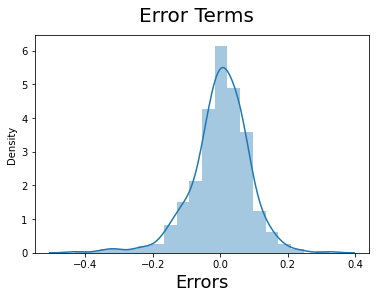

In [40]:
y_bike_assignment_train_cnt = lr_2.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_bike_assignment_train - y_bike_assignment_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

<h2>Making Predictions</h2>

In [41]:
df_bike_assignment_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weathersit_Rain,weathersit_Sunshine
instant,,,,,,,,,,,,,,,,,,,,,
185,0,1,0,0.831783,33.27085,0.657364,0.084219,0.692706,0,0,...,0,1,0,0,0,0,0,0,0,0
536,1,0,1,0.901354,36.04875,0.610133,0.153728,0.712034,0,1,...,0,0,1,0,0,0,0,0,0,1
300,0,0,1,0.511964,22.85230,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,0,1,0,0,0
222,0,0,1,0.881625,34.24915,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,1
153,0,0,1,0.817246,32.19710,0.314298,0.537414,0.569029,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,1,0,0,0.257562,13.22605,0.708888,0.287411,0.336516,1,0,...,0,0,0,0,0,0,0,0,0,0
703,1,0,1,0.519232,23.45270,0.756118,0.283397,0.757478,0,0,...,0,0,0,0,0,0,0,0,0,1
128,0,0,0,0.584649,25.94665,0.650923,0.069510,0.495973,0,1,...,0,0,0,0,1,0,0,0,0,1


In [42]:
features = list(X_bike_assignment.columns)

In [43]:
y_bike_assignment_test = df_bike_assignment_test.pop('cnt')
X_bike_assignment_test = df_bike_assignment_test[features]

# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_bike_assignment_test)

# Creating X_test_m4 dataframe by dropping variables from X_test_m4
# X_test_m4 = X_test_m4.drop(["temp", "hum", "workingday", "holiday"], axis = 1)


C:\Users\bansa\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [44]:
# Making predictions using the final model
y_pred_m4 = lr_2.predict(X_test_m4)

<h2> R² value for the expected test model</h2>

In [45]:
r2_score(y_true = y_bike_assignment_test, y_pred = y_pred_m4)

0.8281625450407033

<h2>Conclusions:</h2>
<ul>
    <li>The R² value for the test data = 0.8281625450407033,</li>
    <li>The R² value for the train data = 0.853;</li>
    
</ul>
 
we can see the value from the final model summary above. 

Since the R² values for both the train and test data are almost equal, the model we built is the best-fitted model.

Data Analysis:-
The features that are profitable for rentals:- 
<ul>
<li>Year</li>
<li>Temp</li>
<li>weathersit_Sunshine</li>
</ul>
The features that are unprofitable for rentals:-
<ul>
<li>Humidity</li>
<li>weathersit_Rain</li>
<li>Wind Speed</li>
</ul>